C:\Users\koray\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:929: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


Best Hyperparameters: {'base_estimator__max_depth': 6, 'learning_rate': 0.01, 'n_estimators': 50}


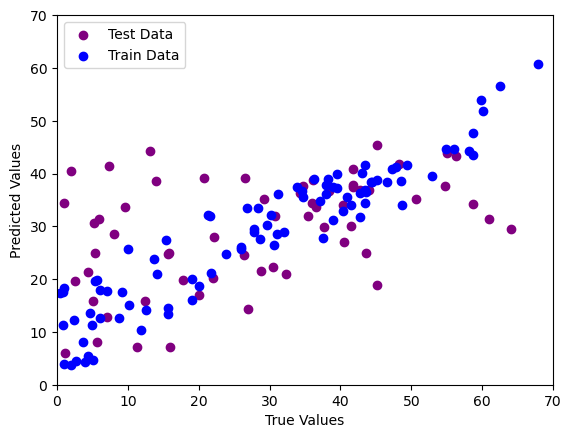

In [12]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin  
from sklearn.preprocessing import MaxAbsScaler,StandardScaler,Normalizer
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler,StandardScaler,Normalizer
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MaxAbsScaler,StandardScaler,Normalizer
from sklearn.feature_selection import RFECV as RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

data=pd.read_csv('Important_features_npvol_3.csv', sep=";")



data_ar=np.array(data)


data.drop('Glass_ID', axis=1, inplace=True)

features_only=np.zeros([154,8])
for i in range(8):
        for j in range (154):
                features_only[j,i] = data_ar[j,i+4]
        
features_only = pd.DataFrame(data)

features_only.columns = data.columns

features_only = features_only.drop(['Nepheline Volume', 'Label'], axis=1)



column_names = list(features_only.columns)  

sc = StandardScaler()
mole_fracs_std = sc.fit_transform(features_only)

mole_fracs_std_df = pd.DataFrame(mole_fracs_std, columns=column_names)

df=pd.DataFrame([])

#df['CharDev5']= mole_fracs_std_df['CharDev5']
df['B2O3']=mole_fracs_std_df['B2O3']
df['Al2O3']=mole_fracs_std_df['Al2O3']
#df['Fe2O3']= mole_fracs_std_df['Fe2O3']
df['SiO2']= mole_fracs_std_df['SiO2']
df['P2O5']= mole_fracs_std_df['P2O5']

#df['Fe/(Fe+Al)']=mole_fracs_std_df['Fe_(Fe+Al)']
df['Si/(Si+Al)'] = mole_fracs_std_df['Si_(Si+Al)']

df['Npvol'] = data['Npvol']
df['Label'] = data['Label']
target =df['Label'].copy()
attr3 = df.drop(['Label'], axis=1)
npvol =df['Npvol'].copy()
attr4 = attr3.drop(['Npvol'], axis=1) #attr4te npvol yok
attr = np.array(attr3) #npvol var 

target = np.array(target)




from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    attr, target, test_size=0.4, random_state=42,stratify=target)

X_train=pd.DataFrame(X_train)
X_train.columns=attr3.columns
npvol_train =X_train['Npvol'].copy()
X_train2 = X_train.drop(['Npvol'], axis=1) 
y_train2=npvol_train

X_test=pd.DataFrame(X_test)
X_test.columns=attr3.columns
npvol_test =X_test['Npvol'].copy()
X_test2 = X_test.drop(['Npvol'], axis=1) 
y_test2=npvol_test


# df['Npvol'] = npvol

#GRID SEARCH START

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [4, 6, 8],
}


rf_reg = RandomForestRegressor()
estimator = rf_reg
ada_regressor = AdaBoostRegressor(estimator=estimator, random_state=42)


grid_search = GridSearchCV(ada_regressor, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train2, y_train2)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters on the entire training set
best_estimator.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred_test = best_estimator.predict(X_test2)
y_pred_train = best_estimator.predict(X_train2)
# Now you can use y_pred for evaluation and visualization



plt.scatter(y_test2,y_pred_test, label='Test Data', c='purple')
plt.scatter(y_train2, y_pred_train, label='Train Data',c='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xlim(0, 70)  
plt.ylim(0, 70) 

plt.legend()
plt.show()
MAE_test = (np.abs(y_pred_test-y_test)).mean()
MAE_train = (np.abs(y_pred_train-y_train)).mean()


